In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb#Seaborn是一个Python的数据可视化库，它提供了一些高层次的接口，可以轻松地创建各种统计图表和数据可视化图表
from scipy.io import loadmat

In [2]:
# K-means聚类算法中的最近邻分类步骤，用于找到距离每个输入样本最近的质心（centroid）
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)

    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i, :] - centroids[j, :])**2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j

    return idx

In [4]:
data2 = pd.read_csv('C:\\Users\\86187\\Desktop\\blockchain-go-demo-main\\machine-learning\\notebook\\WZ-ML\\dataset\\ex7data2.csv')
data2.head()

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


In [5]:
X=data2.values

In [17]:
initial_centroids = initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])#初始化聚类中心，分了三个聚类中心(质心)，其实就是k=3

idx = find_closest_centroids(X, initial_centroids) #找聚类中心
idx[0:3]#输出 0 2 1 代表属于哪个类别，idx[0:3]表示X中前三个样本

array([0., 2., 1.])

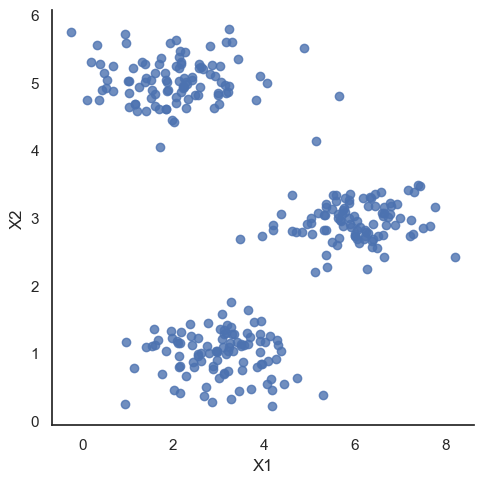

In [18]:
sb.set(context="notebook", style="white")
sb.lmplot(x='X1', y='X2', data=data2, fit_reg=False)
plt.show()

In [19]:
#质心更新步骤，先找到属于该聚类的所有样本，然后计算它们的平均值，以得到该聚类的新质心
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))

    for i in range(k):#k是类别有几个类
        indices = np.where(idx == i)
        centroids[i, :] = (np.sum(X[indices, :], axis=1) /
                           len(indices[0])).ravel()#获取新的质心

    return centroids

In [20]:
compute_centroids(data2.values, idx, 3)#更新一次找到新的聚类中心

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [21]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]#获取一下有几个类别一共
    idx = np.zeros(m)#返回一个向量，表示每个样本所属的类被
    centroids = initial_centroids#initial_centroids是一个大小为(k,n)的矩阵 k代表类别数目，n代表样本的特征数
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)#K-means聚类算法中的最近邻分类步骤，用于找到距离每个输入样本最近的质心
        centroids = compute_centroids(X, idx, k)#质心更新步骤
    
    return idx, centroids

In [22]:
idx, centroids = run_k_means(X, initial_centroids, 10)

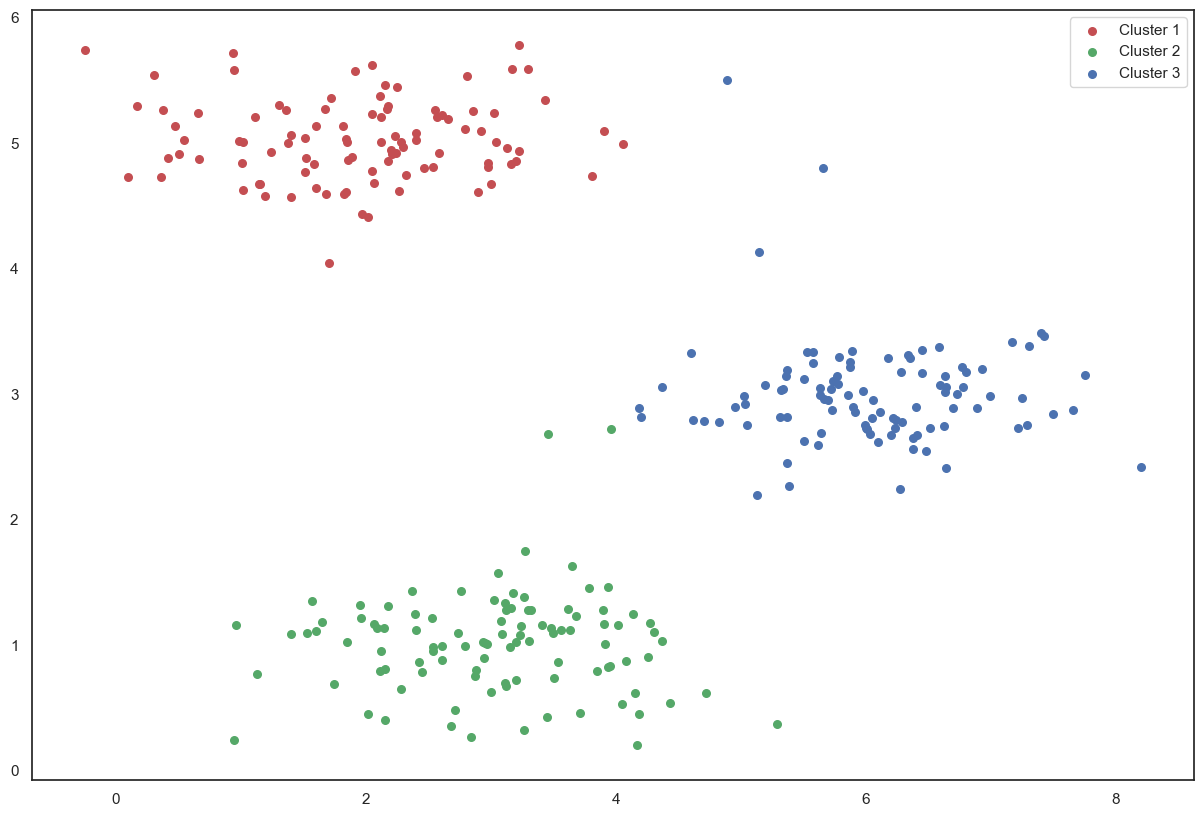

In [23]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()
plt.show()

In [24]:
#我们跳过的一个步骤是初始化聚类中心的过程。 这可以影响算法的收敛。创建一个选择随机样本并将其用作初始聚类中心的函数。

def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)

    for i in range(k):
        centroids[i, :] = X[idx[i], :]

    return centroids

In [25]:
init_centroids(X, 3)

array([[1.97619886, 4.43489674],
       [2.84734459, 0.26759253],
       [5.31712478, 2.81741356]])

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\a

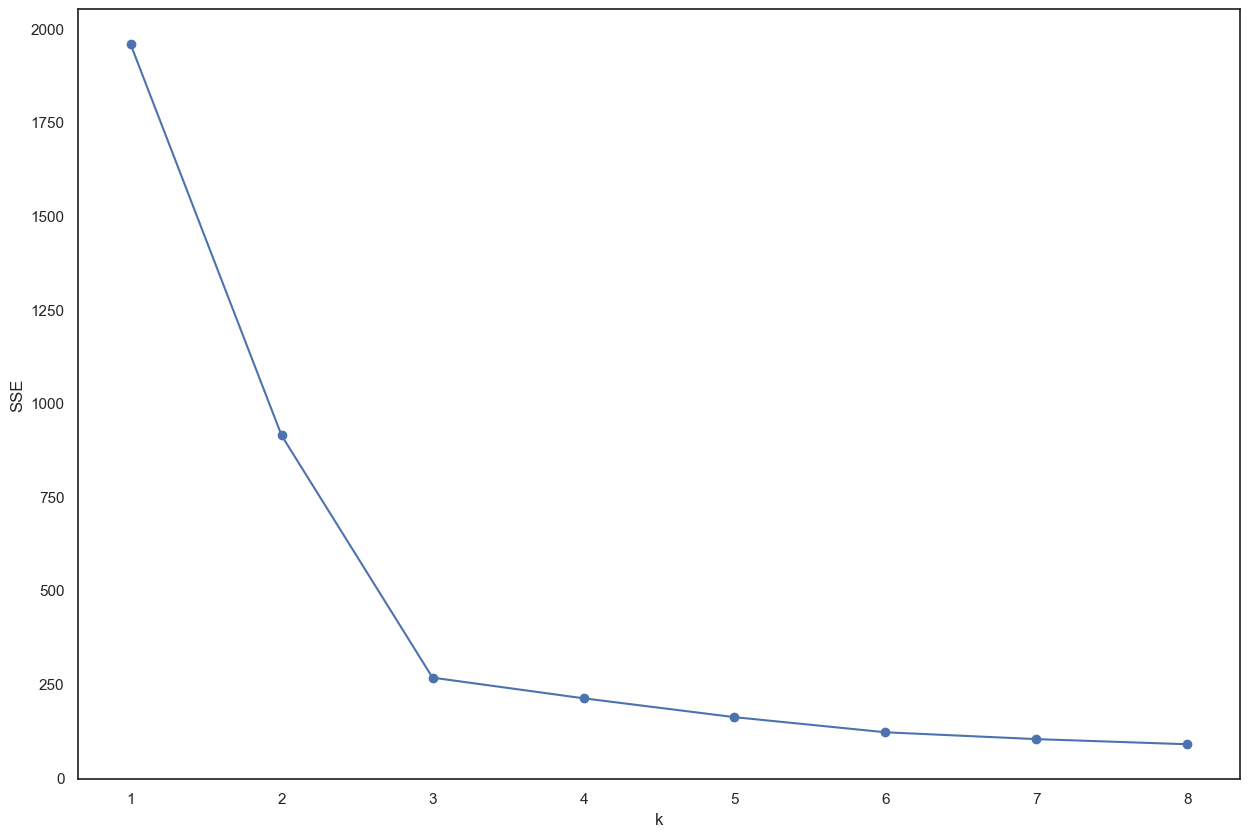

In [26]:
#肘部法则选择K值
from sklearn.cluster import KMeans

# '利用SSE选择k'
SSE = []  # 存放每次结果的误差平方和
for k in range(1, 9):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(data2)
    SSE.append(estimator.inertia_)
X = range(1, 9)

plt.figure(figsize=(15, 10))
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')
plt.show()

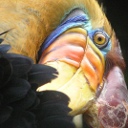

In [27]:
from IPython.display import Image
Image(filename='C:\\Users\\86187\\Desktop\\blockchain-go-demo-main\\machine-learning\\notebook\\WZ-ML\\dataset\\bird_small.png')

In [29]:
image_data = loadmat('C:\\Users\\86187\\Desktop\\blockchain-go-demo-main\\machine-learning\\notebook\\WZ-ML\\dataset\\bird_small.mat')
# image_data

In [30]:
A = image_data['A']
A.shape

(128, 128, 3)

In [31]:
#数据预处理冰实现kmeans算法
A = A / 255.
#重塑数组
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
X.shape

(16384, 3)

In [32]:
# 初始化聚类中心
initial_centroids = init_centroids(X, 16)

# 运行Kmeans算法
idx, centroids = run_k_means(X, initial_centroids, 10)

# 获得最后一次的质心
idx = find_closest_centroids(X, centroids)

# 将每个像素映射到质心值
X_recovered = centroids[idx.astype(int),:]
X_recovered.shape

(16384, 3)

In [33]:
# 重塑为原始尺寸
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
X_recovered.shape

(128, 128, 3)

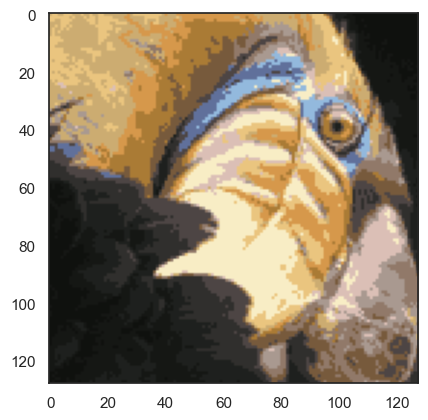

In [34]:
plt.imshow(X_recovered)
plt.show()

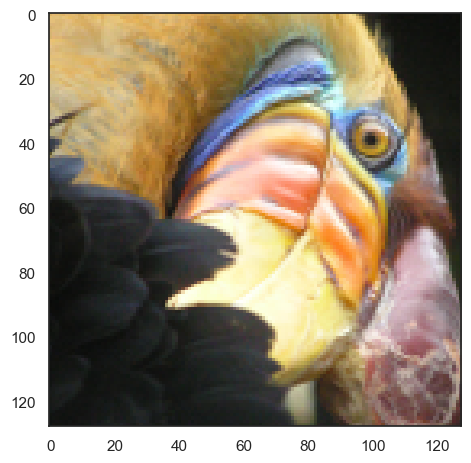

In [35]:
#sklearn
from skimage import io

# cast to float, you need to do this otherwise the color would be weird after clustring
pic = io.imread('C:\\Users\\86187\\Desktop\\blockchain-go-demo-main\\machine-learning\\notebook\\WZ-ML\\dataset\\bird_small.png') / 255.
io.imshow(pic)
plt.show()

In [36]:
pic.shape

(128, 128, 3)

In [37]:
# serialize data
data = pic.reshape(128*128, 3)

In [38]:
data.shape

(16384, 3)

In [39]:
from sklearn.cluster import KMeans#导入kmeans库

model = KMeans(n_clusters=16, n_init=100)#n_clusters代表聚类的数目，n_init代表需要运行100次kmeans算法并从中选择最优的一次作为结果

In [40]:
model.fit(data)#训练没模型

KMeans(n_clusters=16, n_init=100)

In [41]:
centroids = model.cluster_centers_#获取模型质心坐标
print(centroids.shape)#打印其形状

C = model.predict(data)
print(C.shape)

(16, 3)
(16384,)


In [42]:
centroids[C].shape

(16384, 3)

In [43]:
compressed_pic = centroids[C].reshape((128,128,3))

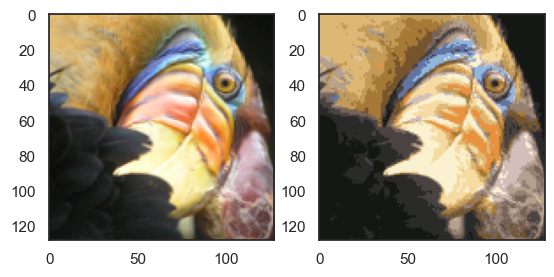

In [44]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(pic)
ax[1].imshow(compressed_pic)
plt.show()